# one-step delta learning rule
- best param found {'sticky_decay_rate': 0.02, 'pe_thresh': 1.0, 'init_lr': 0.25, 'lr_decay_rate': 0.05}

In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from utils import *
import torch as tr

# scratch

In [3]:
rnn = RNNSch(.1,.1)
rnn.eval([1,2,3,5])

tensor([0.1067, 0.1115, 0.1092], grad_fn=<IndexBackward>)

# main

In [29]:
nsubs = 5
task = Task()
ntr,nte = 160,40

accL = [[],[]]
condL = ['blocked','interleaved']
accD = {'R':{c:[] for c in condL},'T':{c:[] for c in condL}}

for ci,cond in enumerate(condL):
  for s in range(nsubs):
    ag = Agent()
    exp,cur = task.generate_experiment(cond,ntr,nte)
    accT,accR = ag.forward_exp(exp) 
    accD['R'][cond].append(accR)
    accD['T'][cond].append(accT)


(200, 5)

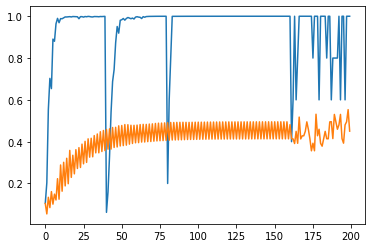

In [30]:
tsteps = [0]
for c in condL:
  Macc = np.mean(accD['R'][c],0) 
  acplt = Macc[:,tsteps]
  plt.plot(acplt)
Macc.shape

In [ ]:
assert False

# diagnostic plots

In [ ]:
f,axar=plt.subplots(1,2,figsize=(16,5))
plt_tsteps = (2,3)
for i in range(2):
  axar[i].set_title(['blocked','interleaved'][i])
  Mac = acc[i].mean(0)
  axar[i].plot(Mac[:,plt_tsteps])
  axar[i].set_ylim(0,1)
  axar[i].axhline(0.5,c='k')


In [ ]:
f,axar=plt.subplots(1,1,figsize=(4,4))
plt_tsteps = (2,3)
for i in range(2):
  Mac = acc[i].mean(0)
  Sac = acc[i].std(0)/np.sqrt(len(acc[i]))
  axar.set_ylim(0,1)
  axar.axhline(0.5,c='k')
  axar.bar(i,Mac[-40:,plt_tsteps].mean(),yerr=Sac[-40:,plt_tsteps].mean())
  axar.set_xticks([0,1])
  axar.set_xticklabels(['blocked','interleaved'])